# List 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


In [47]:
def SIR_euler(beta, r, I_0 = 1, N = 100, dt = 0.01, n = 1000):
    S = np.zeros(n)
    I = np.zeros(n)
    R = np.zeros(n)
    S[0] = N
    I[0] = I_0
    R[0] = 0
    for i in range(1, n):
        S[i] = S[i-1] + dt*( -beta *S[i-1] * I[i-1] )
        I[i] = I[i-1] + dt*( beta * S[i-1] *I[i-1] - r * I[i-1])
        R[i] = R[i-1] + dt*( r * I[i-1])
    return S, I, R

## 1)
Check the formula for $R_0$ by solving the model numerically for different sets of parameters. Fix $N$, and vary $\alpha$ and $r$. Choose your values
such as to have combinations with both $R_0$ > 1 and $R_0$ < 1. Run
the model for each parameter combination, plot the time evolution
of each compartment and record whether there was an epidemic or
not

### a)

In [111]:
beta = 0.0005
r = 1
N_0 = 9999
I_0 = 1
N = N_0+I_0
n = 1000
dt = 0.01

R_0  = beta*N/r
print("R_0=", R_0)  

R_0= 5.0


R_0 = 5.0


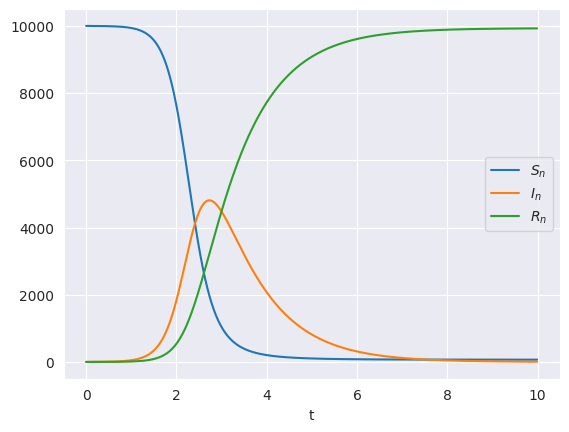

In [112]:
S_n, I_n, R_n  = SIR_euler(beta, r, I_0, N_0, dt, n)
ts = np.arange(0, dt*n, dt)
print("R_0 =", R_0)


fig, ax = plt.subplots()
ax.plot(ts, S_n, label = "$S_n$")
ax.plot(ts, I_n, label = "$I_n$")
ax.plot(ts, R_n, label = "$R_n$")
ax.legend()
plt.xlabel("t")
plt.show()

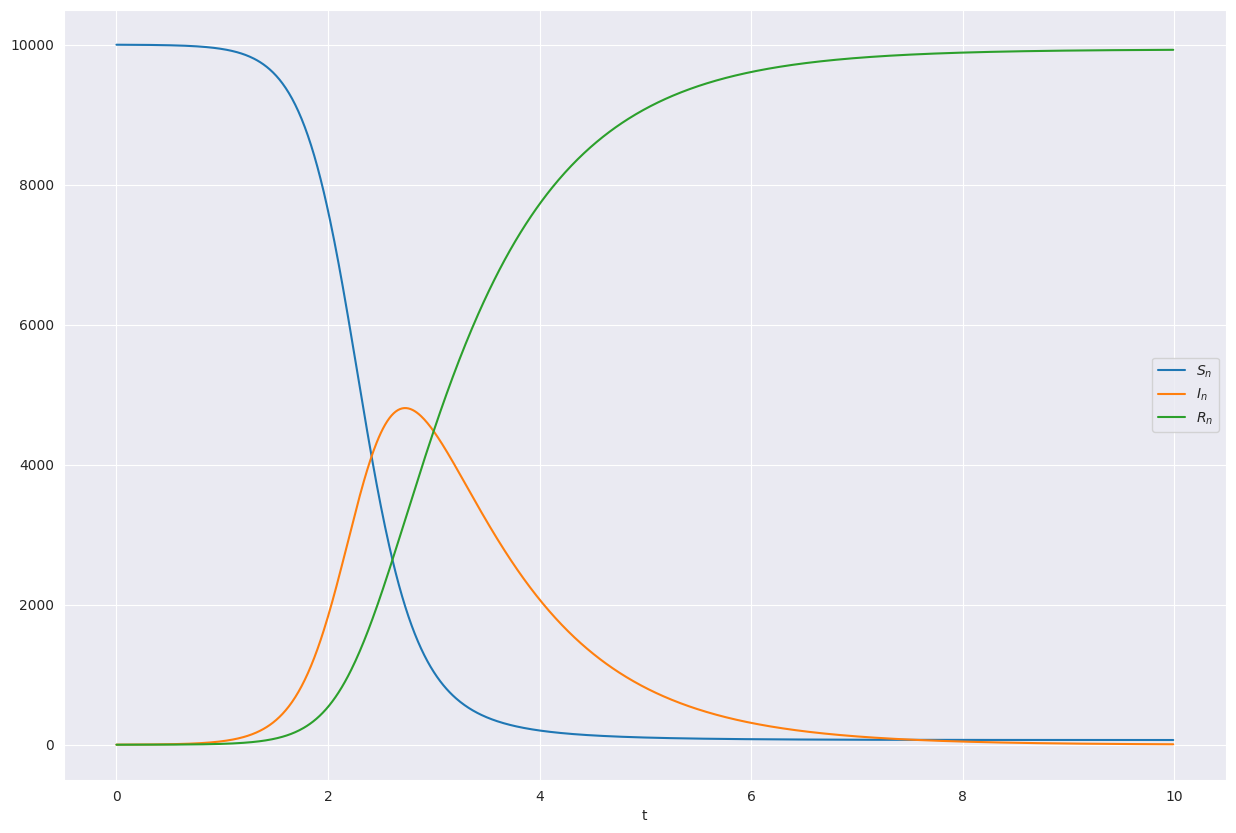

In [113]:
fig.set_figheight(10), fig.set_figwidth(15)
fig

### b)

In [114]:
beta = 0.0001
r = 1
N_0 = 9999
I_0 = 1
N = N_0+I_0
n = 20000
dt = 0.01
R_0  = beta*N/r
print("R_0=", R_0)

R_0= 1.0


R_0 = 1.0


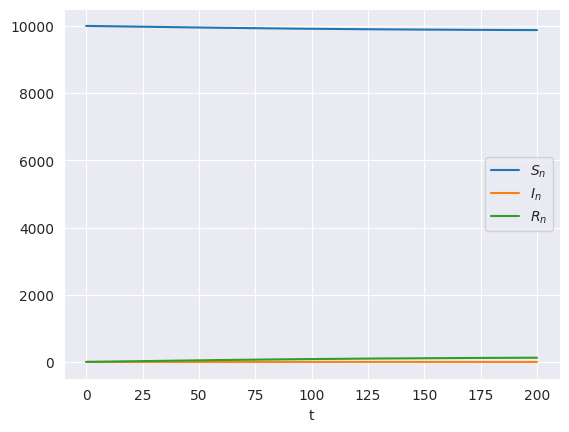

In [115]:
S_n, I_n, R_n  = SIR_euler(beta, r, I_0, N_0, dt, n)
ts = np.arange(0, dt*n, dt)
print("R_0 =", R_0)

fig, ax = plt.subplots()
ax.plot(ts, S_n, label = "$S_n$")
ax.plot(ts, I_n, label = "$I_n$")
ax.plot(ts, R_n, label = "$R_n$")
# plt.hlines(R_0, min(ts), max(ts), colors="r", linestyles="--", label = "R_0")
plt.legend()
plt.xlabel("t")
plt.show()

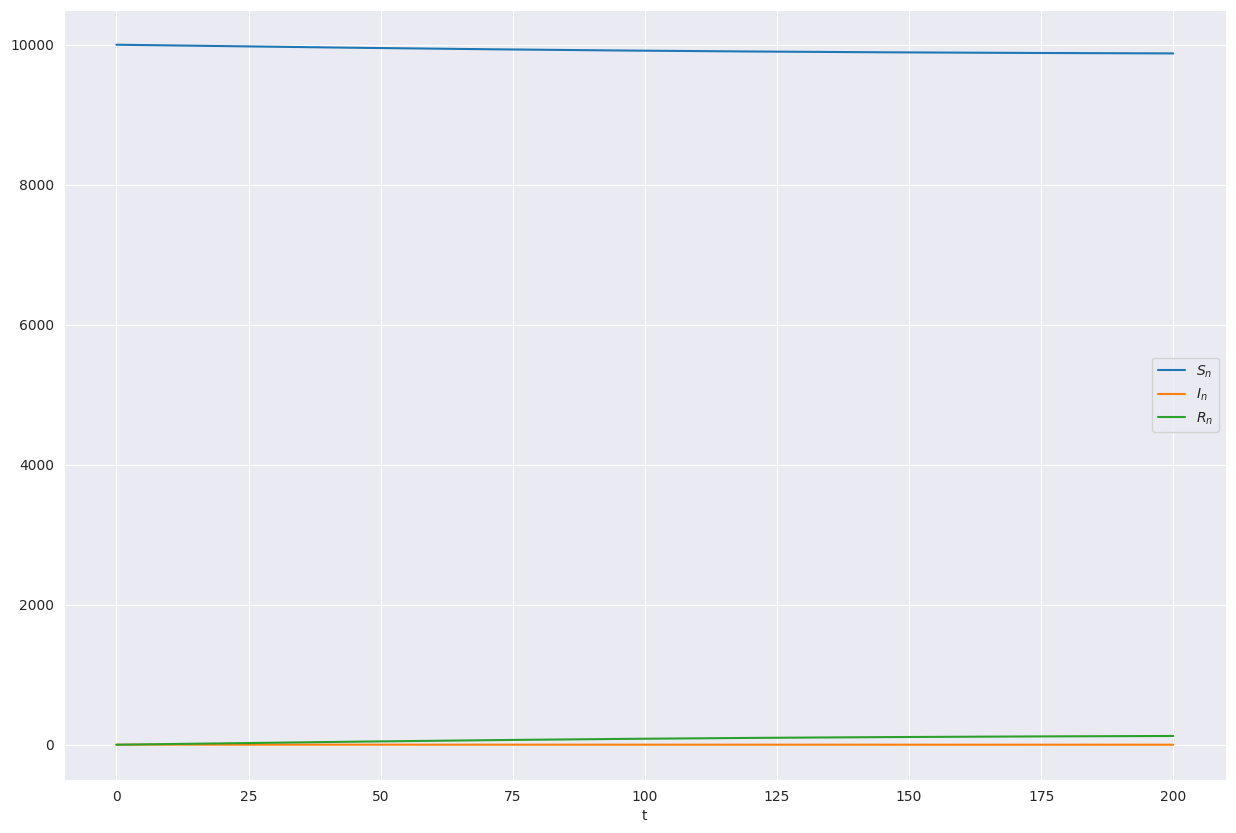

In [116]:
fig.set_figheight(10), fig.set_figwidth(15)
fig

## 2) 
Notice that the basic SIR model can be reduced to a two-dimensional
system, because the variable for recovered individuals does not appear in the equations of the other two variables. The reduced SI
system is thus given by
\begin{gather}
    \frac{dS(t)}{dt} = -\beta SI \\
    \frac{dT(t)}{dt} = \beta SI -rI
\end{gather}
Phase portraits provide a powerful tool to visualize the dynamics of
ODE systems. For a fixed set of parameters, draw a phase portrait
with trajectories corresponding to different initial conditions. (Hint:
cuiver command in the matplotlib library)

### a)

In [88]:
def Dynamics_of_ODE(beta, r, N):
    R_0= round(beta*N/r, 3)
    S = np.arange(1, N, 50)
    L = np.arange(1, N, 50)

    X, Y = np.meshgrid(S, L)

    u = -beta * X * Y
    v = beta * X * Y - r * Y

    color = np.sqrt(u**2 + v**2)
    fig, ax = plt.subplots(figsize =(8, 10))
    ax.streamplot(X, Y, u, v, density=1., cmap='jet', arrowsize=1)
    ax.set_aspect('equal')
    ax.set_xlabel("S")
    ax.set_ylabel("L")
    ax.set_title(f"Dynamics of ODE systems for $r = {r}$,$\\beta={beta}$ and $R_0={R_0}$")
    plt.show()
    return fig

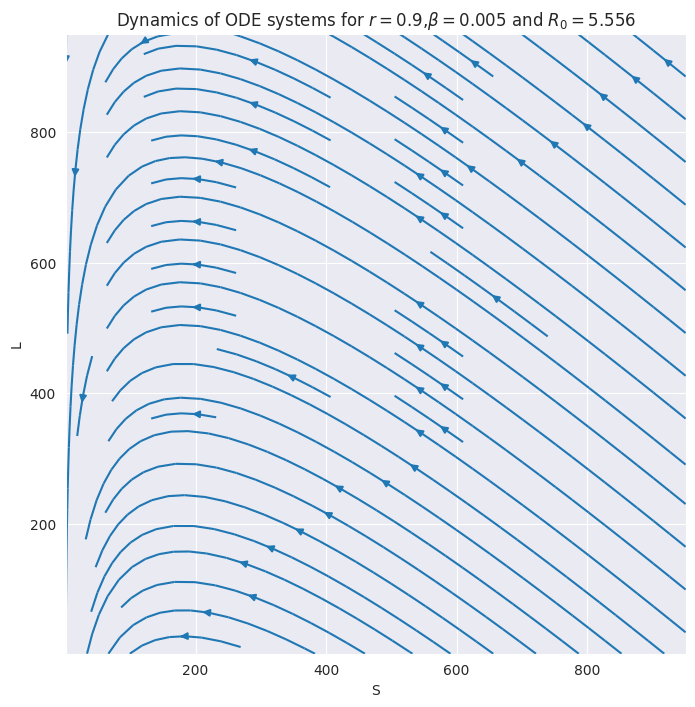

In [89]:
beta = 0.005
r = 0.9
N = 1000
fig = Dynamics_of_ODE(beta, r, N)

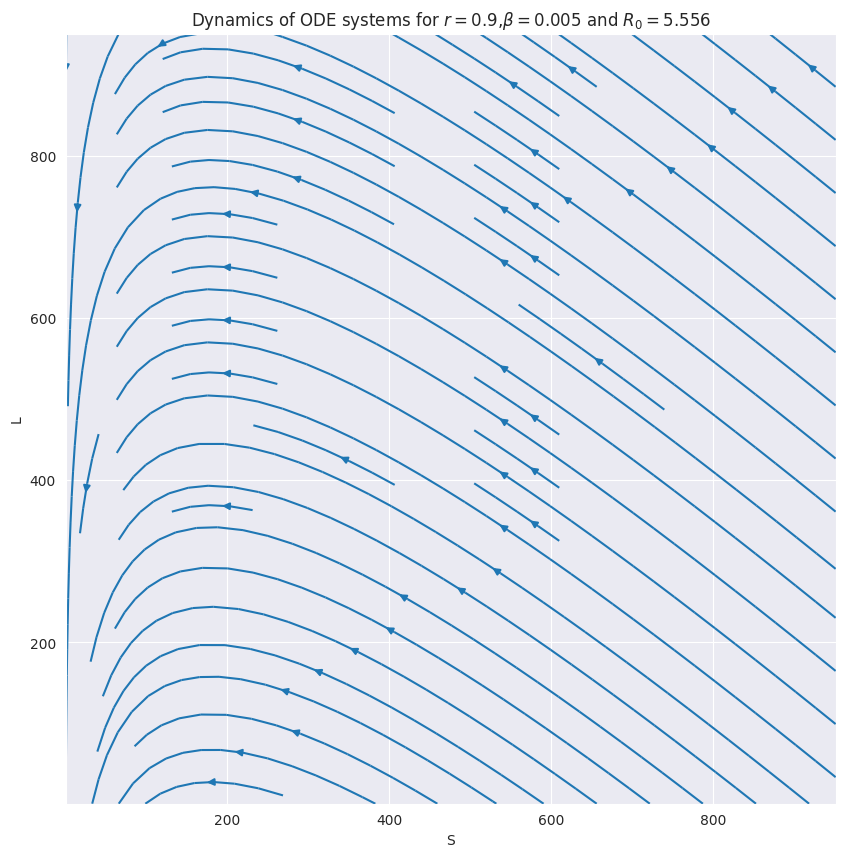

In [90]:
fig.set_figheight(10), fig.set_figwidth(10)
fig

### b)

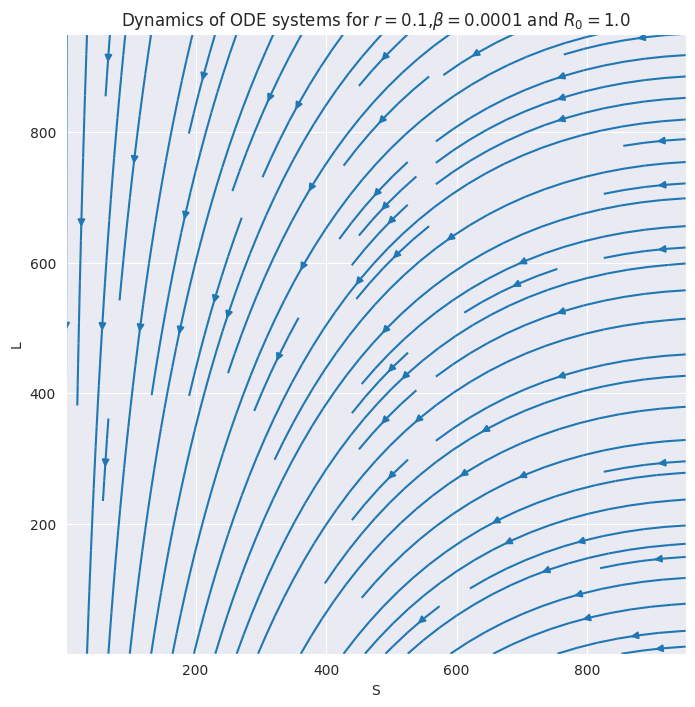

In [91]:
beta = 0.0001
r = 0.1
N= 1000
fig = Dynamics_of_ODE(beta, r, N)

### c)

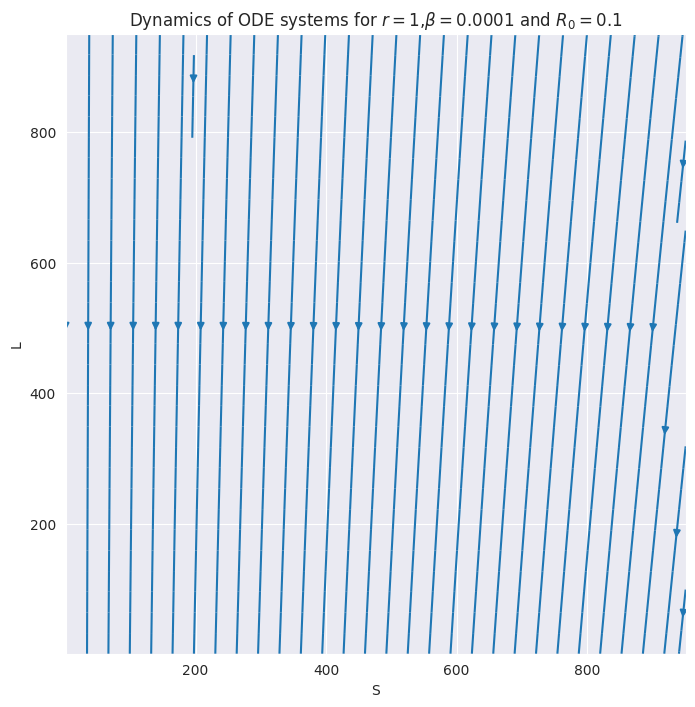

In [93]:
beta = 0.0001
r = 1
N= 1000
fig = Dynamics_of_ODE(beta, r, N)

### Interpretation
Ther solutions converge in $t \to \infty$ to line $L = 0$,  we also can see that the infected rate is decreasing for $R_0 \le 1$

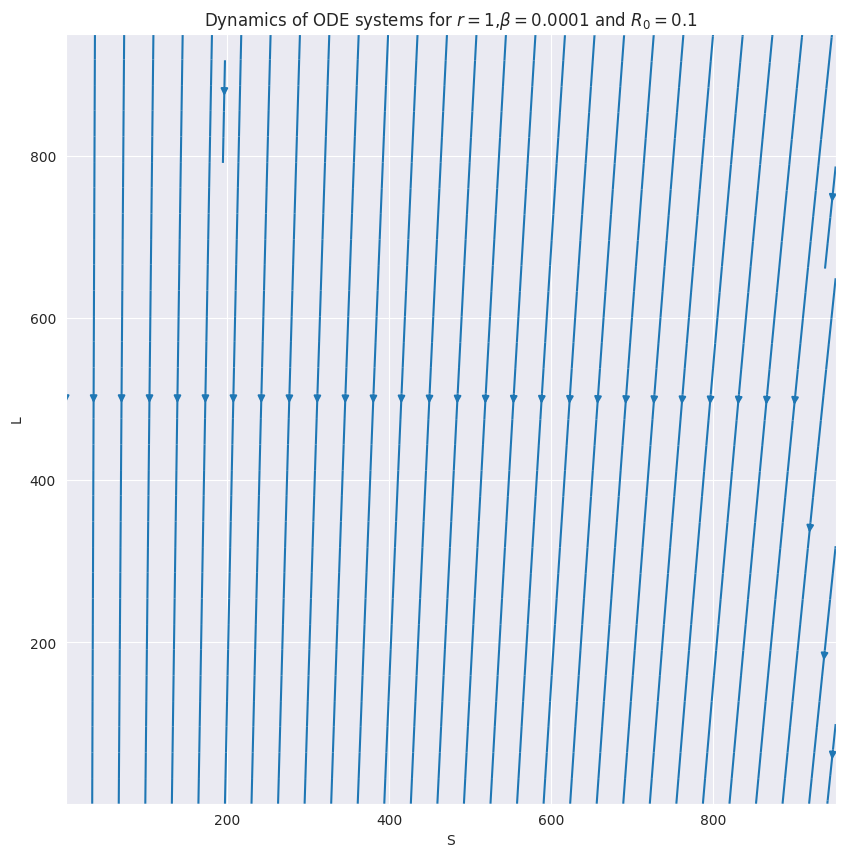

In [94]:
fig.set_figheight(10), fig.set_figwidth(10)
fig

## 3)
For different combinations of r and β determine the total number
of individuals infected during an epidemic and then calculate R0 for
each parameter set. Plot the total number of infections as a function
of R0

In [101]:
N_0 = 999
I_0 = 1
N = N_0+I_0
n = 10000
dt = 0.01
rn = 150
bn = 10
r_s = np.array(np.linspace(0.05, 2, rn))
b_s = np.array(np.linspace(0.000001, 0.002, bn))

In [96]:
R0_s = np.zeros((rn, bn))
max_I_s = np.zeros((rn, bn))

infected_s = np.zeros((rn, bn))
for i, r in enumerate(r_s):
    for j, beta in enumerate(b_s):
        R0_s[i,j] = beta*N/r
        _, I_n, R_n  = SIR_euler(beta, r, I_0, N_0, dt, n)
        infected_s[i,j] = R_n[-1]
        max_I_s[i,j] = max(I_n)

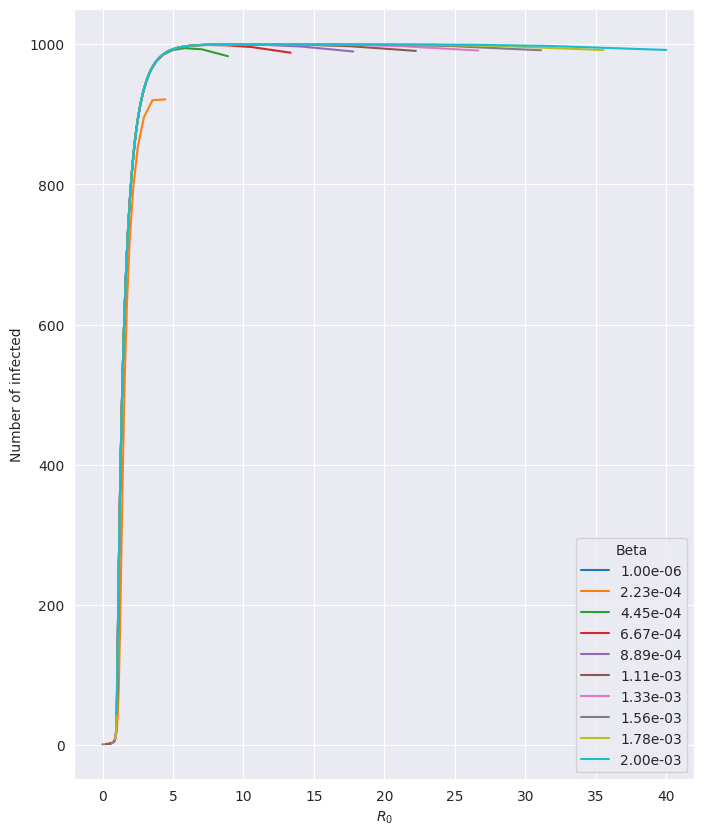

In [109]:
fig, ax = plt.subplots(figsize =(8, 10))
for i, beta in enumerate(b_s):
    ax.plot(R0_s[:,i], infected_s[:,i], label = "%.2e"%beta)
ax.set_ylabel("Number of infected")
ax.set_xlabel("$R_0$")
ax.legend(title = "Beta")
plt.show()

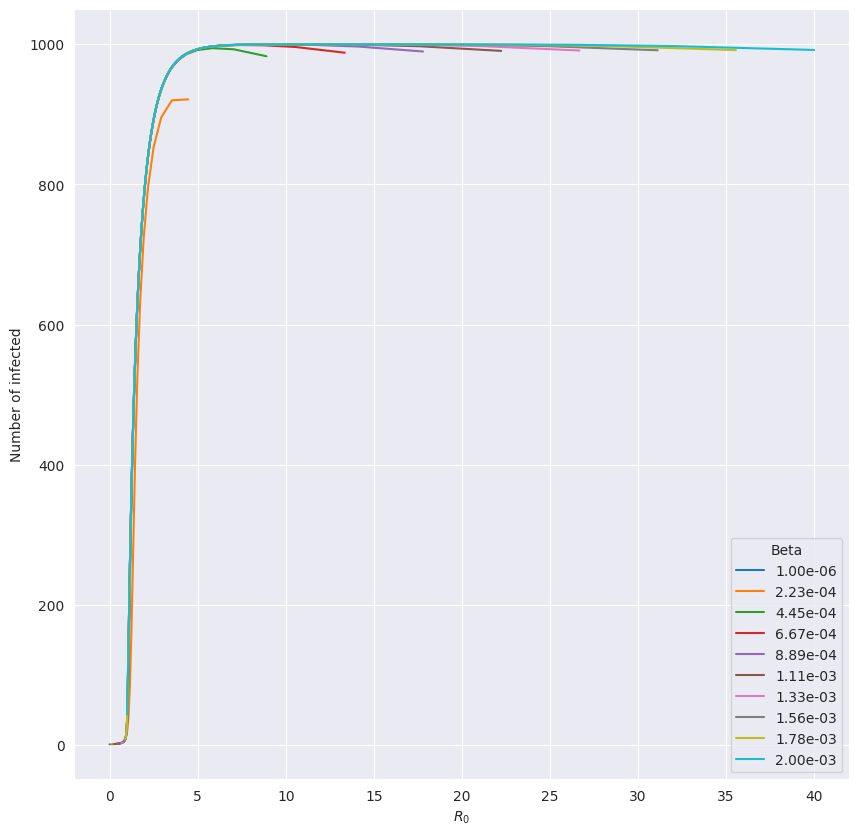

In [110]:
fig.set_figheight(10), fig.set_figwidth(10)
fig

### Interpretation

\begin{gather}
\lim_{R_0 \to \infty}\#\text{infection}(R_0) = N
\end{gather}
